In [12]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [13]:
from citipy import citipy
import requests


In [14]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the API key.
from config import weather_api_key

In [15]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6be336e4e898cf127f86b8ab025c70c7


In [16]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [17]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [18]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

640

In [19]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | horadiz
Processing Record 2 of Set 13 | ndele
Processing Record 3 of Set 13 | ahuimanu
Processing Record 4 of Set 13 | hamilton
Processing Record 5 of Set 13 | francisco sa
Processing Record 6 of Set 13 | airai
Processing Record 7 of Set 13 | mayo
Processing Record 8 of Set 13 | qaanaaq
Processing Record 9 of Set 13 | lolua
City not found. Skipping...
Processing Record 10 of Set 13 | atuona
Processing Record 11 of Set 13 | loma bonita
Processing Record 12 of Set 13 | hirara
Processing Record 13 of Set 13 | saint-philippe
Processing Record 14 of Set 13 | bredasdorp
Processing Record 15 of Set 13 | san patricio
Processing Record 16 of Set 13 | attawapiskat
City not found. Skipping...
Processing Record 17 of Set 13 | ixtapa
Processing Record 18 of Set 13 | hobart
Processing Record 19 of Set 13 | rikitea
Processing Record 20 of Set 13 | castro
Processing Record 21 of Set 13 | new norfolk
Processing 

Processing Record 35 of Set 16 | rio grande
Processing Record 36 of Set 16 | baisha
Processing Record 37 of Set 16 | buala
Processing Record 38 of Set 16 | mbaiki
Processing Record 39 of Set 16 | vanavara
Processing Record 40 of Set 16 | salalah
Processing Record 41 of Set 16 | joaima
Processing Record 42 of Set 16 | iqaluit
Processing Record 43 of Set 16 | celestun
Processing Record 44 of Set 16 | koster
Processing Record 45 of Set 16 | zhanakorgan
Processing Record 46 of Set 16 | nelson bay
Processing Record 47 of Set 16 | tokur
Processing Record 48 of Set 16 | quelimane
Processing Record 49 of Set 16 | neuquen
Processing Record 50 of Set 16 | kamenskoye
City not found. Skipping...
Processing Record 1 of Set 17 | tazmalt
Processing Record 2 of Set 17 | taoudenni
Processing Record 3 of Set 17 | katherine
Processing Record 4 of Set 17 | kapaa
Processing Record 5 of Set 17 | seoul
Processing Record 6 of Set 17 | igarka
Processing Record 7 of Set 17 | dikson
Processing Record 8 of Set 17

Processing Record 18 of Set 20 | kamenka
Processing Record 19 of Set 20 | agirish
Processing Record 20 of Set 20 | sao gabriel da cachoeira
Processing Record 21 of Set 20 | qasigiannguit
Processing Record 22 of Set 20 | necochea
Processing Record 23 of Set 20 | aklavik
Processing Record 24 of Set 20 | kaura namoda
Processing Record 25 of Set 20 | zeya
Processing Record 26 of Set 20 | gorontalo
Processing Record 27 of Set 20 | novouzensk
Processing Record 28 of Set 20 | hauge
Processing Record 29 of Set 20 | mersing
Processing Record 30 of Set 20 | emerald
Processing Record 31 of Set 20 | snasa
Processing Record 32 of Set 20 | abeche
Processing Record 33 of Set 20 | monte alegre
Processing Record 34 of Set 20 | tadine
Processing Record 35 of Set 20 | moree
Processing Record 36 of Set 20 | kajiado
Processing Record 37 of Set 20 | pyay
Processing Record 38 of Set 20 | zabaykalsk
Processing Record 39 of Set 20 | muzhi
Processing Record 40 of Set 20 | tucuman
Processing Record 41 of Set 20 

Processing Record 6 of Set 24 | belushya guba
City not found. Skipping...
Processing Record 7 of Set 24 | mutsamudu
City not found. Skipping...
Processing Record 8 of Set 24 | codroipo
Processing Record 9 of Set 24 | severnoye
Processing Record 10 of Set 24 | ati
Processing Record 11 of Set 24 | ukiah
Processing Record 12 of Set 24 | djibo
Processing Record 13 of Set 24 | belyy yar
Processing Record 14 of Set 24 | beidao
Processing Record 15 of Set 24 | vardo
Processing Record 16 of Set 24 | hualmay
Processing Record 17 of Set 24 | pretoria
Processing Record 18 of Set 24 | marcona
City not found. Skipping...
Processing Record 19 of Set 24 | aden
Processing Record 20 of Set 24 | datong
Processing Record 21 of Set 24 | gimli
Processing Record 22 of Set 24 | sarno
Processing Record 23 of Set 24 | touros
Processing Record 24 of Set 24 | kuroiso
Processing Record 25 of Set 24 | chulumani
Processing Record 26 of Set 24 | kachug
Processing Record 27 of Set 24 | lagoa
Processing Record 28 of S

In [21]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Horadiz,39.4488,47.3353,50.77,77,100,1.92,AZ,2021-10-29 23:57:01
1,Ndele,8.4109,20.6473,72.52,72,100,1.48,CF,2021-10-29 23:57:01
2,Ahuimanu,21.4447,-157.8378,86.77,64,90,9.22,US,2021-10-29 23:57:02
3,Hamilton,39.1834,-84.5333,58.05,97,90,1.01,US,2021-10-29 23:57:02
4,Francisco Sa,-16.4758,-43.4883,78.94,50,69,10.71,BR,2021-10-29 23:57:03
5,Airai,-8.9266,125.4092,71.13,62,81,2.08,TL,2021-10-29 23:57:03
6,Mayo,38.8876,-76.5119,61.99,96,90,4.00,US,2021-10-29 23:57:04
7,Qaanaaq,77.4840,-69.3632,14.27,70,100,8.19,GL,2021-10-29 23:57:04
8,Atuona,-9.8000,-139.0333,77.38,72,24,12.39,PF,2021-10-29 23:57:05
9,Loma Bonita,8.3833,-80.1667,78.35,83,75,11.50,PA,2021-10-29 23:57:05


In [25]:
# Create the output file (CSV).
output_data_file = "weather_datacities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [26]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [28]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'10/29/21'

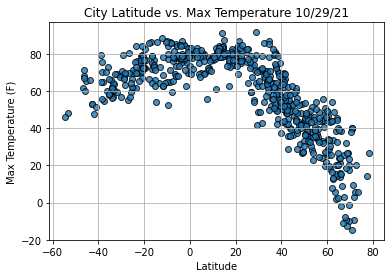

In [30]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_dataFig1.png")

# Show plot.
plt.show()

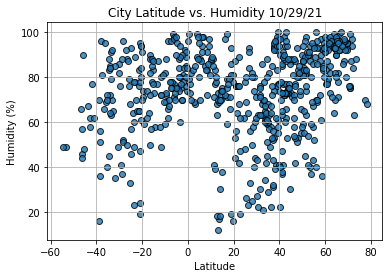

In [32]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_dataFig2.png")
# Show plot.
plt.show()

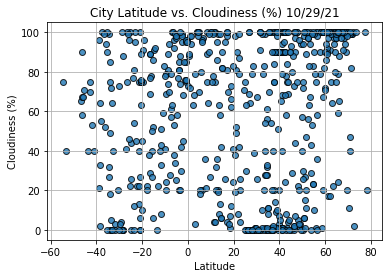

In [33]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_dataFig3.png")
# Show plot.
plt.show()

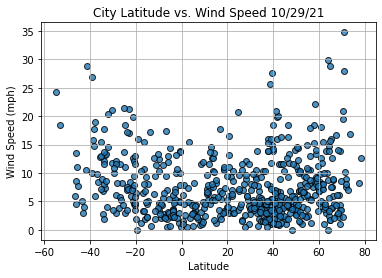

In [34]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_dataFig4.png")
# Show plot.
plt.show()